In [2]:
#imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joypy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#### Data Preprocessing:

##### Dataset splitting to test-set(bad) and train-set(good)

In [3]:
data = pd.read_csv('/mnt/c/Users/anast/Documents/GitHub/Diploma-Thesis/data/dataset.csv')

#Male --> 0, Female -->1
data['Sex'] = data['Sex'].replace(['M', 'F'],['0', '1'])
data = data.drop(['ID', 'Age'], axis=1)
df = data
#df

In [4]:
#generated data // bad_data - test set
# Select a subset of rows and columns to reduce // atrophy simulation
test_df = df.sample(frac=0.5)  # Adjust fraction as needed

#outer join for independent test set
good_df = pd.merge(df, test_df, indicator=True, how='outer').query('_merge == "left_only"').drop(columns=['_merge'])
good_df = good_df.dropna()

In [5]:
#Divide the dataset to brain regions
#FRONTAL
frontal_upper_limit = test_df.columns.get_loc('MUSE_Volume_174')
frontal_lower_limit = test_df.columns.get_loc('MUSE_Volume_105')

#OCCIPITAL
occipital_lower_limit = test_df.columns.get_loc('MUSE_Volume_161')
occipital_upper_limit = test_df.columns.get_loc('MUSE_Volume_134')

#TEMPORAL
temporal_lower_limit = test_df.columns.get_loc('MUSE_Volume_123')
temporal_upper_limit = test_df.columns.get_loc('MUSE_Volume_206')

#PARIETAL
parietal_lower_limit = test_df.columns.get_loc('MUSE_Volume_107')
parietal_upper_limit = test_df.columns.get_loc('MUSE_Volume_168')

#DEEP_WM_GM
deep_wm_gm_lower_limit = test_df.columns.get_loc('MUSE_Volume_30')
deep_wm_gm_upper_limit = test_df.columns.get_loc('MUSE_Volume_47')

#LIMBIC
limbic_lower_limit = test_df.columns.get_loc('MUSE_Volume_101')
limbic_upper_limit = test_df.columns.get_loc('MUSE_Volume_170')

#CEREBELLUM
cerebellum_lower_limit = test_df.columns.get_loc('MUSE_Volume_38')
cerebellum_upper_limit = test_df.columns.get_loc('MUSE_Volume_73') 

In [6]:
#Atrophy simulation

#Generate factors to multiply the selected values, adjust limits as needed
frontal_factors = np.random.uniform(0.85, 1, size=(test_df.shape[0], frontal_upper_limit+1))
occipital_factors = np.random.uniform(0.85, 1, size=(test_df.shape[0], 1+occipital_upper_limit))
temporal_factors = np.random.uniform(0.85, 1, size=(test_df.shape[0], 1+temporal_upper_limit))
parietal_factors = np.random.uniform(0.85, 1, size=(test_df.shape[0], 1+parietal_upper_limit))
deep_wm_gm_factors = np.random.uniform(1, 1, size=(test_df.shape[0], 1+deep_wm_gm_upper_limit))
limbic_factors = np.random.uniform(1, 1, size=(test_df.shape[0], 1+limbic_upper_limit))
cerebellum_factors = np.random.uniform(1, 1, size=(test_df.shape[0], 1+cerebellum_upper_limit))

#frontal , atrophy in first 450 subjects
for j in range(frontal_lower_limit, frontal_upper_limit):
    for i in range(0, 450):
        test_df.iloc[i, j] *= frontal_factors[i, j]

#occipital
for j in range(occipital_lower_limit, occipital_upper_limit+1):
    for i in range(450, 900):
        test_df.iloc[i, j] *= occipital_factors[i, j]

#temporal
for j in range(temporal_lower_limit, temporal_upper_limit+1):
    for i in range(900, 1350):
        test_df.iloc[i, j] *= temporal_factors[i, j]

#parietal
for j in range(parietal_lower_limit, parietal_upper_limit+1):
    for i in range(1350, 1800):
        test_df.iloc[i, j] *= parietal_factors[i, j]

#deep_wm_gm
for j in range(deep_wm_gm_lower_limit, deep_wm_gm_upper_limit+1):
    for i in range(0, test_df.shape[0]):
        test_df.iloc[i, j] *= deep_wm_gm_factors[i, j]

#limbic
for j in range(limbic_lower_limit, limbic_upper_limit+1):
    for i in range(0, test_df.shape[0]):
        test_df.iloc[i, j] *= limbic_factors[i, j]

#cerebellum
for j in range(cerebellum_lower_limit, cerebellum_upper_limit+1):
    for i in range(0, test_df.shape[0]):
        test_df.iloc[i, j] *= cerebellum_factors[i, j]

bad_df=test_df.dropna()

In [7]:
#add labels for atrophy pattern
new_column_values = ['frontal'] * 450 + ['occipital'] * 450 + ['temporal'] * 450 + ['parietal'] * 450 +  ['NA'] * (test_df.shape[0] - 1800)
test_df['pattern'] = new_column_values

In [8]:
#check for statistical significant difference in specific atrophy sub-dataset, i.e. temporal
from scipy.stats import ttest_ind
for j in range(temporal_lower_limit, temporal_upper_limit + 1):
    col1 = good_df.iloc[:, j] 
    col2 = [test_df.iloc[i, j] for i in range (901,1351)]
    t_statistic, p_value = ttest_ind(col1, col2)
    print(f"T-test between column {j} of goof_df and test_df:")
    print(f"  T-statistic: {t_statistic}")
    print(f"  P-value: {p_value}")

T-test between column 62 of goof_df and test_df:
  T-statistic: 11.753790138770029
  P-value: 3.807383217814062e-31
T-test between column 63 of goof_df and test_df:
  T-statistic: 9.939902058401904
  P-value: 6.851179381072848e-23
T-test between column 64 of goof_df and test_df:
  T-statistic: 11.664514761307673
  P-value: 1.0371254365083279e-30
T-test between column 65 of goof_df and test_df:
  T-statistic: 11.958849616751666
  P-value: 3.7139662347037785e-32
T-test between column 66 of goof_df and test_df:
  T-statistic: 9.706848858942461
  P-value: 6.390635227754402e-22
T-test between column 67 of goof_df and test_df:
  T-statistic: 12.85030553698801
  P-value: 9.926513636938871e-37
T-test between column 68 of goof_df and test_df:
  T-statistic: 11.629669296801605
  P-value: 1.5307228815474829e-30
T-test between column 69 of goof_df and test_df:
  T-statistic: 12.38250835874504
  P-value: 2.707652803747876e-34
T-test between column 70 of goof_df and test_df:
  T-statistic: 10.898982

##### DLICV Correction

###### Correction Good data

Text(0.5, 29.140624999999986, 'Intracranial Volume')

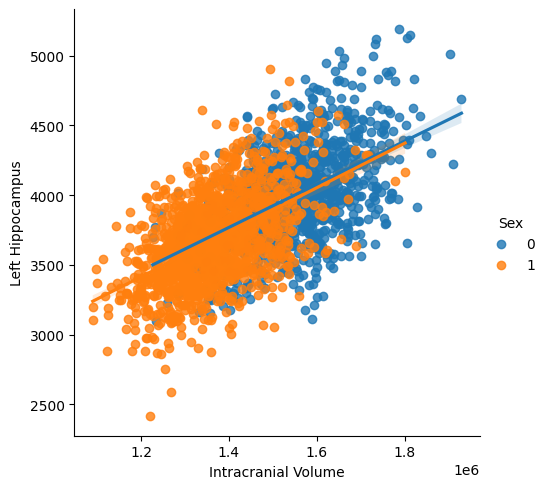

In [9]:
sns.lmplot(data=good_df, x='DLICV_baseline', y='MUSE_Volume_48', hue='Sex')
plt.ylabel('Left Hippocampus')
plt.xlabel('Intracranial Volume')

In [10]:
#Adjustment for confounders using Linean Regression

# Step 1: Split the good_df
# Assume 'predictor_column' is the column you want to use as the predictor (regressor)
good_residuals_df = good_df
predictor_column = 'DLICV_baseline'
specific_column = 'Sex'
target_columns = [col for col in good_df.columns if col != predictor_column and col != specific_column and col != 'pattern']


X = good_df[[predictor_column]]
y = good_df[target_columns]

# Step 2: Create and Train the Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Create a linear regression model for each target variable
models = {}
for target in target_columns:
    model = LinearRegression()
    model.fit(X_train, y_train[target])
    models[target] = model

# Step 3: replace the values with residuals values
for target, model in models.items():
    y_pred = model.predict(X_test)
    good_residuals_df[target] = y_test[target] - y_pred

# Step 4: Interpret the Results
# Interpret the coefficients of the linear regression model
for target, model in models.items():
    print(f"Target Variable: {target}")
    print(f"Coefficient: {model.coef_[0]}")
    print(f"Intercept: {model.intercept_}")
    print()

Target Variable: MUSE_Volume_105
Coefficient: 0.0009690067448284534
Intercept: 207.3454539776485

Target Variable: MUSE_Volume_137
Coefficient: 0.0013396445625549933
Intercept: 345.0403223377068

Target Variable: MUSE_Volume_147
Coefficient: 0.0026640981239691207
Intercept: 442.54604621921317

Target Variable: MUSE_Volume_179
Coefficient: 0.0015858590322073238
Intercept: 782.8884519497774

Target Variable: MUSE_Volume_104
Coefficient: 0.0013514739895262862
Intercept: 20.663032433903027

Target Variable: MUSE_Volume_136
Coefficient: 0.0011346439549147207
Intercept: 487.25682556830657

Target Variable: MUSE_Volume_146
Coefficient: 0.002204905215589224
Intercept: 1140.8498155373072

Target Variable: MUSE_Volume_178
Coefficient: 0.001708114716101704
Intercept: 716.5638700379423

Target Variable: MUSE_Volume_103
Coefficient: 0.0020132465179311817
Intercept: 1309.637942931924

Target Variable: MUSE_Volume_173
Coefficient: 0.0010024196115835807
Intercept: 777.2823854397868

Target Variable: M

In [11]:
#shifting values
min_value = np.zeros(len(target_columns))
for i, target in enumerate(target_columns):
    min_value[i] = good_residuals_df[target].min()
    if min_value[i] < 0:
        good_residuals_df.loc[:, target] = good_residuals_df[target] - min_value[i]
good_df = good_residuals_df.dropna()        

Text(0.5, 29.140624999999986, 'Intracranial Volume')

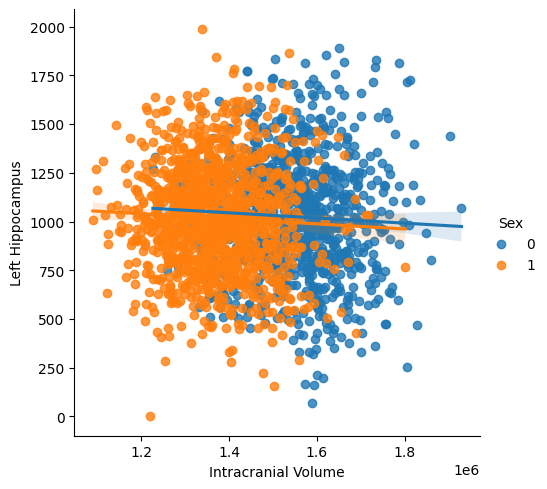

In [12]:
sns.lmplot(data=good_df, x='DLICV_baseline', y='MUSE_Volume_48', hue='Sex')
plt.ylabel('Left Hippocampus')
plt.xlabel('Intracranial Volume')

###### Correction bad data

Text(0.5, 29.140624999999986, 'Intracranial Volume')

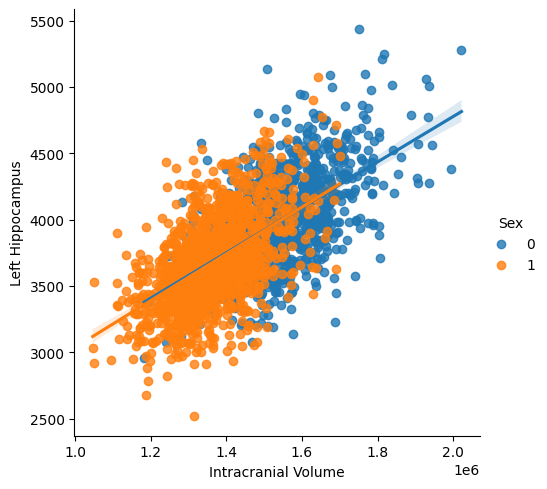

In [13]:
sns.lmplot(data=bad_df, x='DLICV_baseline', y='MUSE_Volume_48', hue='Sex')
plt.ylabel('Left Hippocampus')
plt.xlabel('Intracranial Volume')

In [14]:
# Step 1: Split the test_df
# Assume 'predictor_column' is the column you want to use as the predictor (regressor)
bad_residuals_df = bad_df
predictor_column = 'DLICV_baseline'
specific_column = 'Sex'
target_columns = [col for col in test_df.columns if col != predictor_column and col != specific_column and col != 'pattern']

X_test = test_df[[predictor_column]]
y_test = test_df[target_columns]

# Step 2: replace the values with residuals values, same models
for target, model in models.items():
    y_pred = model.predict(X_test)
    bad_residuals_df[target] = y_test[target] - y_pred
    
# Step 3: Interpret the Results
# Interpret the coefficients of the linear regression model
for target, model in models.items():
    print(f"Target Variable: {target}")
    print(f"Coefficient: {model.coef_[0]}")
    print(f"Intercept: {model.intercept_}")
    print()

Target Variable: MUSE_Volume_105
Coefficient: 0.0009690067448284534
Intercept: 207.3454539776485

Target Variable: MUSE_Volume_137
Coefficient: 0.0013396445625549933
Intercept: 345.0403223377068

Target Variable: MUSE_Volume_147
Coefficient: 0.0026640981239691207
Intercept: 442.54604621921317

Target Variable: MUSE_Volume_179
Coefficient: 0.0015858590322073238
Intercept: 782.8884519497774

Target Variable: MUSE_Volume_104
Coefficient: 0.0013514739895262862
Intercept: 20.663032433903027

Target Variable: MUSE_Volume_136
Coefficient: 0.0011346439549147207
Intercept: 487.25682556830657

Target Variable: MUSE_Volume_146
Coefficient: 0.002204905215589224
Intercept: 1140.8498155373072

Target Variable: MUSE_Volume_178
Coefficient: 0.001708114716101704
Intercept: 716.5638700379423

Target Variable: MUSE_Volume_103
Coefficient: 0.0020132465179311817
Intercept: 1309.637942931924

Target Variable: MUSE_Volume_173
Coefficient: 0.0010024196115835807
Intercept: 777.2823854397868

Target Variable: M

In [15]:
#shifting values based on good_residuals_df
for i, target in enumerate(target_columns):
    bad_residuals_df.loc[:, target] = bad_residuals_df[target] - min_value[i]
test_df = bad_residuals_df.dropna()

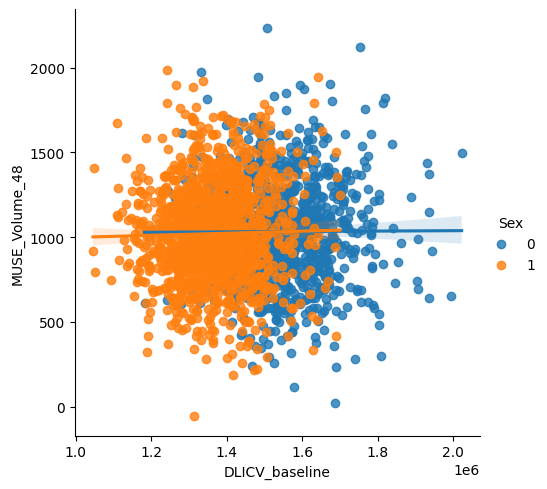

In [16]:
#sns.lmplot(data=frontal_bad_df_residuals, x='DLICV_baseline', y='MUSE_Volume_48', hue='Sex')
sns.lmplot(data=test_df, x='DLICV_baseline', y='MUSE_Volume_48', hue='Sex')

##### Scaling:

In [17]:
scaler = StandardScaler()

good_df = good_df.drop(['Sex', 'DLICV_baseline'], axis=1)
x_good = scaler.fit_transform(good_df)
df_scaled = pd.DataFrame(x_good, columns=good_df.columns)

In [18]:
#bad data
test_df = test_df.drop(['Sex', 'DLICV_baseline'], axis=1)

x_bad = scaler.transform(test_df)  #only transform
test_df_scaled = pd.DataFrame(x_bad, columns=test_df.columns)

In [19]:
#recalculation of the limits
#FRONTAL
frontal_upper_limit = test_df.columns.get_loc('MUSE_Volume_174')
frontal_lower_limit = test_df.columns.get_loc('MUSE_Volume_105')

#OCCIPITAL
occipital_lower_limit = test_df.columns.get_loc('MUSE_Volume_161')
occipital_upper_limit = test_df.columns.get_loc('MUSE_Volume_134')

#TEMPORAL
temporal_lower_limit = test_df.columns.get_loc('MUSE_Volume_123')
temporal_upper_limit = test_df.columns.get_loc('MUSE_Volume_206')

#PARIETAL
parietal_lower_limit = test_df.columns.get_loc('MUSE_Volume_107')
parietal_upper_limit = test_df.columns.get_loc('MUSE_Volume_168')

#DEEP_WM_GM
deep_wm_gm_lower_limit = test_df.columns.get_loc('MUSE_Volume_30')
deep_wm_gm_upper_limit = test_df.columns.get_loc('MUSE_Volume_47')

#LIMBIC
limbic_lower_limit = test_df.columns.get_loc('MUSE_Volume_101')
limbic_upper_limit = test_df.columns.get_loc('MUSE_Volume_170')

#CEREBELLUM
cerebellum_lower_limit = test_df.columns.get_loc('MUSE_Volume_38')
cerebellum_upper_limit = test_df.columns.get_loc('MUSE_Volume_73')

#### Autoencoders 

In [20]:
x_good_train, x_good_val = train_test_split(
    x_good, test_size=0.25, random_state=42)
print(x_good.shape[1])

119


In [21]:
#creating an array of dictionaries
regions = [
    {
        "name": "FRONTAL",
        "lower_limit": frontal_lower_limit,
        "upper_limit": frontal_upper_limit
    },
    {
        "name": "OCCIPITAL",
        "lower_limit": occipital_lower_limit,
        "upper_limit": occipital_upper_limit
    },
    {
        "name": "TEMPORAL",
        "lower_limit": temporal_lower_limit,
        "upper_limit": temporal_upper_limit
    },
    {
        "name": "PARIETAL",
        "lower_limit": parietal_lower_limit,
        "upper_limit": parietal_upper_limit
    },
    {
        "name": "DEEP_WM_GM",
        "lower_limit": deep_wm_gm_lower_limit,
        "upper_limit": deep_wm_gm_upper_limit
    },
    {
        "name": "LIMBIC",
        "lower_limit": limbic_lower_limit,
        "upper_limit": limbic_upper_limit
    },
    {
        "name": "CEREBELLUM",
        "lower_limit": cerebellum_lower_limit,
        "upper_limit": cerebellum_upper_limit
    },
]

In [22]:
#function for calculation the reconstruction error of each region
def mae_region(actual_values, predicted_values, region_name):
    
    # Ensure both arrays have the same length
    if len(actual_values) != len(predicted_values):
        raise ValueError("Arrays must have the same length.")
    
    # Known key and value
    known_key = "name"
    known_value = region_name
    # Iterating through the dictionary to find other values
    for r in regions:
        if r.get(known_key) == known_value:
            idx_min = r["lower_limit"]
            idx_max = r["upper_limit"]
            # Indexes for rows and columns to keep elements between
            start_col, end_col = r["lower_limit"], r["upper_limit"]+1

            # Create boolean mask
            mask = np.zeros_like(actual_values, dtype=bool)
            mask[0:, start_col:end_col] = True

            # Apply the mask
            filtered_actual = actual_values[mask]
            filtered_pred = predicted_values[mask]
            
    # Calculate differences between actual and predicted values
    errors = [p - a for a, p in zip(filtered_actual, filtered_pred)]
    errors = [x if x >= 0 else 0 for x in errors]
    err = np.mean(errors)
    
    return err

###### Optuna fine tuning

In [ ]:
#Optuna for hyperparameters of the model selection

import optuna
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


x_train = x_good_train
x_test = x_good_val

# Define deep autoencoder model
def create_deep_autoencoder(num_layers, neurons_per_layer, latent_dim):
    input_img = Input(shape=(x_train.shape[1],))
    encoded = input_img
    for i in range(num_layers):
        encoded = Dense(neurons_per_layer[i], activation='selu')(encoded)
    encoded = Dense(latent_dim, activation='selu')(encoded)
    decoded = encoded
    for i in range(num_layers):
        decoded = Dense(neurons_per_layer[num_layers - i - 1], activation='selu')(decoded)
    decoded = Dense(x_train.shape[1], activation='sigmoid')(decoded)
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mae')
    return autoencoder

# Define objective function for Optuna
def objective(trial):
    # Define hyperparameters to optimize
    num_layers = trial.suggest_int('num_layers', 2, 5)
    latent_dim = trial.suggest_int('latent_dim', 16, 52)
    neurons_per_layer = [trial.suggest_int(f'layer_{i}', 50, 256) for i in range(num_layers)]
    
    # Create deep autoencoder with suggested hyperparameters
    autoencoder = create_deep_autoencoder(num_layers, neurons_per_layer, latent_dim)
    
    # Train autoencoder
    autoencoder.fit(x_train, x_train, epochs=20, verbose=1)
    
    # Evaluate autoencoder on validation data
    score = autoencoder.evaluate(x_test, x_test, verbose=1)
    return score

# Perform hyperparameter optimization using Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Get best hyperparameters and results
best_params = study.best_params
best_loss = study.best_value

print("Best loss:", best_loss)
print("Best parameters:", best_params)

#### Vanilla AE

###### Vanilla Autoencoder Implementation:

In [27]:
#autoencoder with L2 regularization
from tensorflow.keras import regularizers

class AnomalyDetector(Model):
    def __init__(self, l2_reg=1e-3):
        super(AnomalyDetector, self).__init__()
        # Define encoder
        self.encoder = tf.keras.Sequential([
            layers.Dense(x_good_train.shape[1], activation='selu', kernel_regularizer=regularizers.l2(l2_reg)),
            layers.Dense(100, activation='selu', kernel_regularizer=regularizers.l2(l2_reg)),
            layers.Dense(64, activation='selu', kernel_regularizer=regularizers.l2(l2_reg)),
            layers.Dense(32, activation='selu', kernel_regularizer=regularizers.l2(l2_reg))])
        
        # Define decoder
        self.decoder = tf.keras.Sequential([
            layers.Dense(64, activation='selu', kernel_regularizer=regularizers.l2(l2_reg)),
            layers.Dense(100, activation='selu', kernel_regularizer=regularizers.l2(l2_reg)),
            layers.Dense(x_good_train.shape[1], activation='linear', kernel_regularizer=regularizers.l2(l2_reg))])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

# Assuming x_good_train is defined elsewhere
model_1 = AnomalyDetector(l2_reg=1e-3)

In [28]:
model_1.compile(optimizer='adam', loss='mae')
history = model_1.fit(x_good_train, x_good_train, 
                      verbose=1,
                      epochs=20,
                      batch_size=16,
                      validation_data=(x_good_val, x_good_val), shuffle=True)

Epoch 1/20
96/96 [==============================] - 3s 14ms/step - loss: 1.2572 - val_loss: 1.1105
Epoch 2/20
96/96 [==============================] - 1s 13ms/step - loss: 1.0292 - val_loss: 0.9707
Epoch 3/20
96/96 [==============================] - 1s 13ms/step - loss: 0.9126 - val_loss: 0.8801
Epoch 4/20
96/96 [==============================] - 1s 13ms/step - loss: 0.8359 - val_loss: 0.8199
Epoch 5/20
96/96 [==============================] - 1s 15ms/step - loss: 0.7829 - val_loss: 0.7785
Epoch 6/20
96/96 [==============================] - 2s 16ms/step - loss: 0.7473 - val_loss: 0.7489
Epoch 7/20
96/96 [==============================] - 2s 20ms/step - loss: 0.7219 - val_loss: 0.7277
Epoch 8/20
96/96 [==============================] - 2s 21ms/step - loss: 0.7048 - val_loss: 0.7144
Epoch 9/20
96/96 [==============================] - 3s 27ms/step - loss: 0.6924 - val_loss: 0.7044
Epoch 10/20
96/96 [==============================] - 2s 25ms/step - loss: 0.6837 - val_loss: 0.6961
Epoch 11/

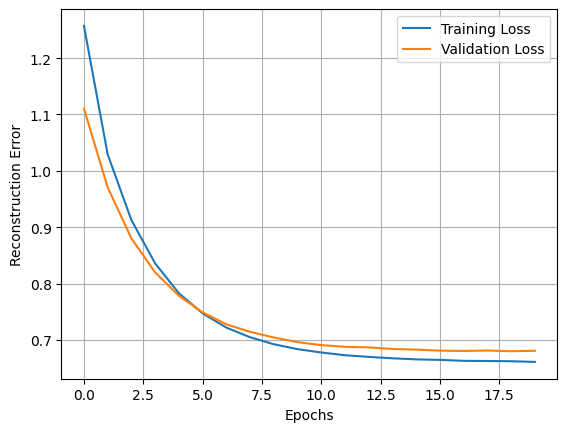

In [29]:
plt.grid()
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Error')
plt.legend()

In [30]:
pred1 = model_1.predict(x_good)
score1 = metrics.mean_absolute_error(pred1,x_good)

pred2 = model_1.predict(x_good_val)
score2 = metrics.mean_absolute_error(pred2,x_good_val)

pred3 = model_1.predict(x_bad)
score3 = metrics.mean_absolute_error(pred3,x_bad)

print(f"Insample Good Score (MAE): {score1}".format(score1))
print(f"Out of Sample Good Score (MAE): {score2}".format(score2))
print(f"Bad sample Score (MAE): {score3}".format(score3))

71/71 [==============================] - 0s 3ms/step
Insample Good Score (MAE): 0.5131438027321252
Out of Sample Good Score (MAE): 0.5308997386711103
Bad sample Score (MAE): 0.5350623267386431


##### Results

In [31]:
encoded_inf = model_1.encoder(x_bad).numpy()
decoded_inf = model_1.decoder(encoded_inf).numpy()

In [32]:
#errors per region for model1 for frontal atrophy
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'CEREBELLUM'))

FRONTAL:    0.35318612955545137
OCCIPITAL:  0.2416334716530234
TEMPORAL:   0.23920714572755003
PARIETAL:   0.2815646479505175


In [33]:
#errors per region for model1 for occipital atrophy
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'CEREBELLUM'))

FRONTAL:    0.2653982439926536
OCCIPITAL:  0.35926376127543885
TEMPORAL:   0.24457457671797356
PARIETAL:   0.2492510022195947


In [34]:
#errors per region for model1 for temporal atrophy
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(x_bad, decoded_inf, 'LIMBIC'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'CEREBELLUM'))

FRONTAL:    0.24921577181641863
OCCIPITAL:  0.24346870788698305
TEMPORAL:   0.4165138750866948
PARIETAL:   0.2784364319846935


In [35]:
#errors per region for model1 for parietal atrophy
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(x_bad, decoded_inf, 'LIMBIC'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'CEREBELLUM'))

FRONTAL:    0.266872211516194
OCCIPITAL:  0.23165203382553418
TEMPORAL:   0.2783278921739499
PARIETAL:   0.4204017072049379


In [36]:
#errors per region for model1 for healthy subjects
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(x_bad, decoded_inf, 'LIMBIC'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'CEREBELLUM'))

FRONTAL:    0.26558579004529353
OCCIPITAL:  0.25782272408846024
TEMPORAL:   0.26053902444996585
PARIETAL:   0.2772349173873346


In [37]:
#vanilla Autoencoder

column_list = test_df.columns.tolist()
bad_df = pd.DataFrame(x_bad, columns=column_list)
pred_df = model_1.predict(x_bad)
res_df = pred_df - bad_df
res_df[res_df < 0] = 0
res_df['atrophy pattern']= new_column_values

71/71 [==============================] - 0s 3ms/step


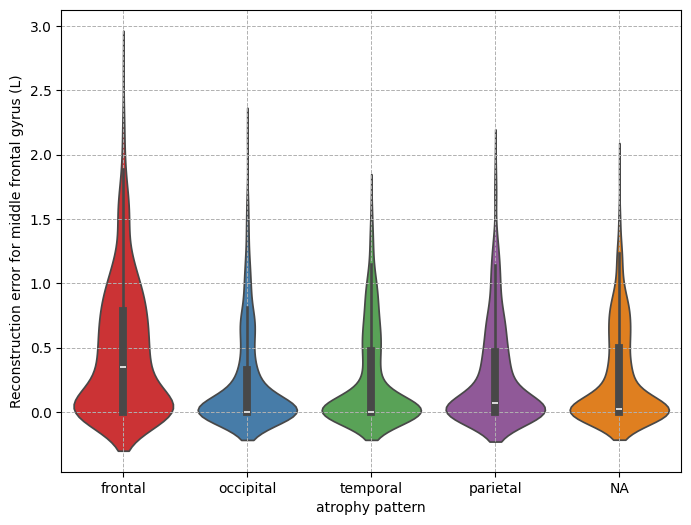

In [38]:
#violinplot frontal 1
my_pal_sex = sns.color_palette("Set1", 5)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_143', x='atrophy pattern', data=res_df, hue='atrophy pattern', palette=my_pal_sex,
             ax=ax)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.rcParams.update({'font.size': 14})
plt.ylabel('Reconstruction error for middle frontal gyrus (L)')

# Show the plot
plt.show()

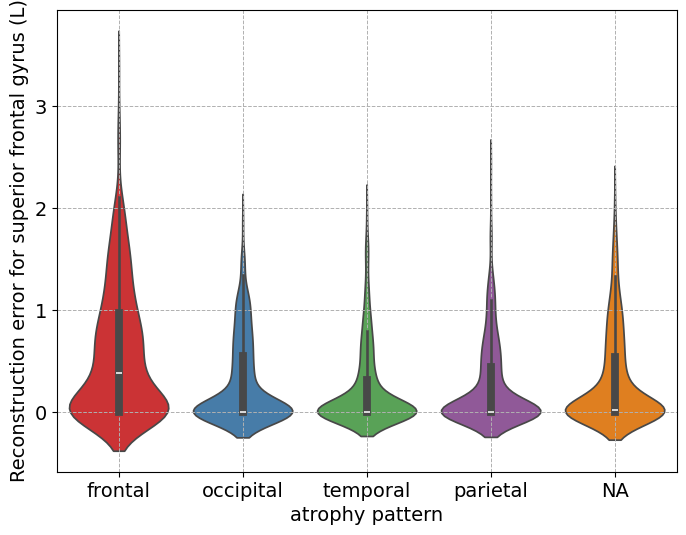

In [39]:
#violinplot frontal 2
my_pal_sex = sns.color_palette("Set1", 5)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))


sns.violinplot(y='MUSE_Volume_191', x='atrophy pattern', data=res_df, hue='atrophy pattern', palette=my_pal_sex,
             ax=ax)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for superior frontal gyrus (L)')

# Show the plot
plt.show()

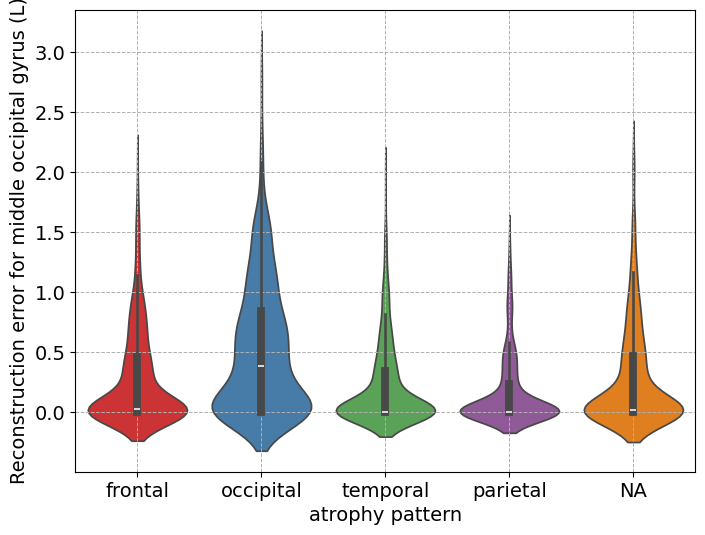

In [40]:
#violinplot occipital 1
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_145', x='atrophy pattern', data=res_df, hue='atrophy pattern', palette=my_pal_sex,
             ax=ax)
# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for middle occipital gyrus (L)')
plt.rcParams.update({'font.size': 14})
# Show the plot
plt.show()

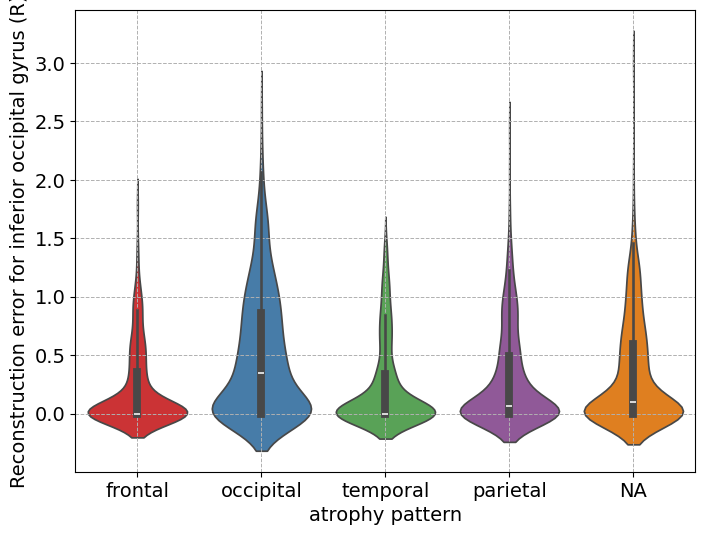

In [41]:
#violinplot occipital 2
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_128', x='atrophy pattern', data=res_df, hue='atrophy pattern', palette=my_pal_sex,
             ax=ax)
# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for inferior occipital gyrus (R)')
# Show the plot
plt.show()

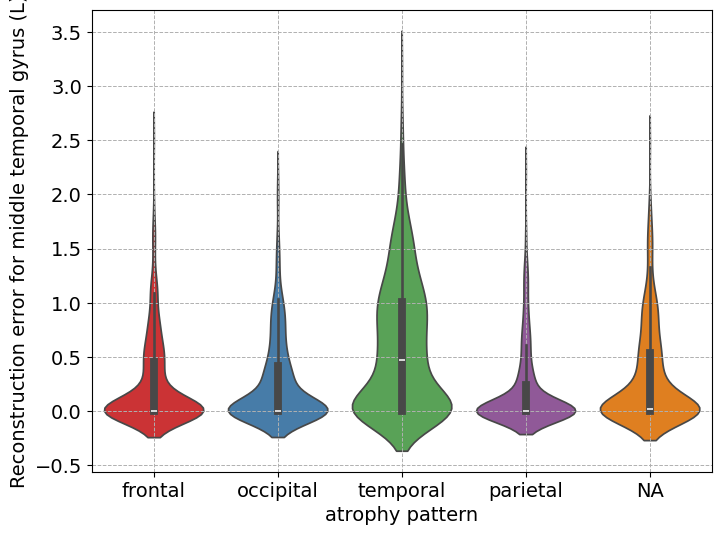

In [42]:
#violinplot temporal 1
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_155', x='atrophy pattern', data=res_df, hue='atrophy pattern', legend = False,
                palette=my_pal_sex)
# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for middle temporal gyrus (L)')
plt.rcParams.update({'font.size': 13})

# Show the plot
plt.show()

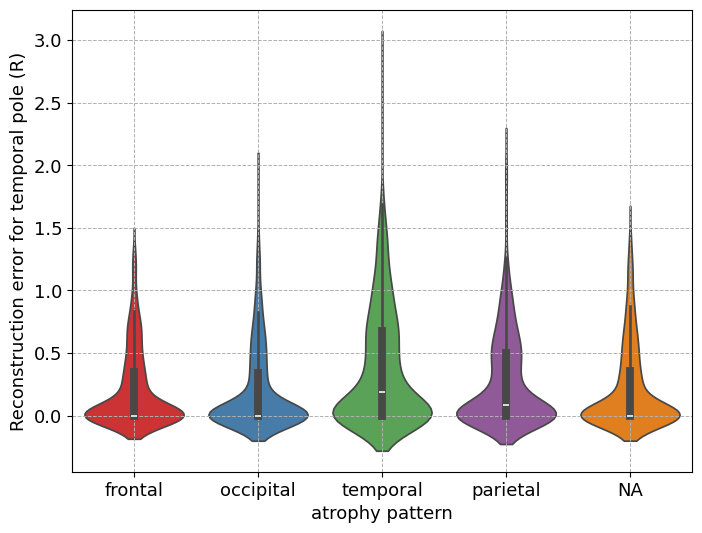

In [43]:
#boxplot temporal 2
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_202', x='atrophy pattern', data=res_df, hue='atrophy pattern', legend = False,
                palette=my_pal_sex)
# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for temporal pole (R)')
# Show the plot
plt.show()

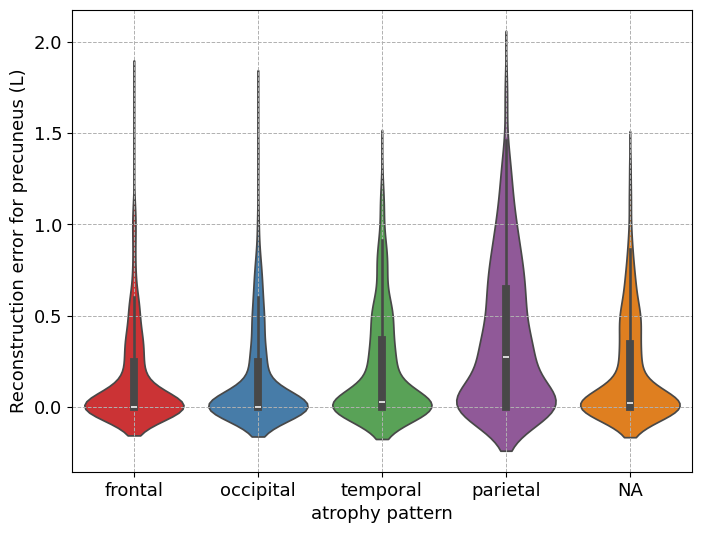

In [44]:
#boxplot parietal 1
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_169', x='atrophy pattern', data=res_df, hue='atrophy pattern', legend = False,
                palette=my_pal_sex)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for precuneus (L)')
plt.rcParams.update({'font.size': 15})
# Show the plot
plt.show()

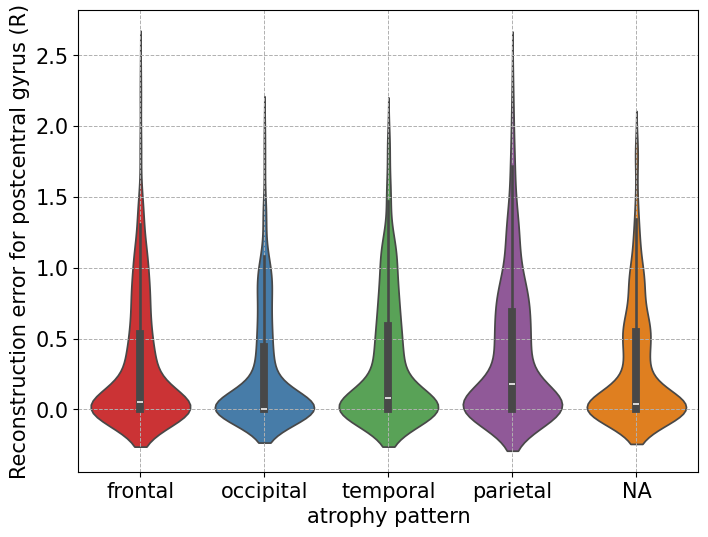

In [45]:
#boxplot parietal 2
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_176', x='atrophy pattern', data=res_df, hue='atrophy pattern', legend = False,
                palette=my_pal_sex)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for postcentral gyrus (R)')

# Show the plot
plt.show()

#### Variational AE:

In [46]:
#Variational autoencoder implementation

# Define the encoder
latent_dim = 32  # This is the dimension of the latent space
input_shape = x_good.shape[1]  # Number of features in the dataset

inputs = layers.Input(shape=(input_shape,))
x = layers.Dense(100, activation='selu')(inputs)
x = layers.Dense(64, activation='selu')(x)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Define the decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(64, activation='selu')(latent_inputs)
x = layers.Dense(100, activation='selu')(x)
outputs = layers.Dense(input_shape, activation='linear')(x)

# Instantiate the encoder and decoder models
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
decoder = Model(latent_inputs, outputs, name='decoder')

# Instantiate the VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')


# Define the loss
reconstruction_loss = tf.keras.losses.mean_squared_error(inputs, outputs)
#reconstruction_loss *= input_shape

kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_sum(kl_loss, axis=-1)
kl_loss *= -0.5

vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

In [47]:
vae.compile(optimizer='adam')#, loss = 'mae')
history = vae.fit(x_good_train, x_good_train, 
                      verbose=1,
                      epochs=20,
                      batch_size=16,
                      validation_data=(x_good_val, x_good_val), shuffle=True)

Epoch 1/20
96/96 [==============================] - 4s 18ms/step - loss: 17.2915 - val_loss: 6.6119
Epoch 2/20
96/96 [==============================] - 2s 18ms/step - loss: 4.4626 - val_loss: 3.3835
Epoch 3/20
96/96 [==============================] - 2s 18ms/step - loss: 2.6562 - val_loss: 2.3746
Epoch 4/20
96/96 [==============================] - 2s 19ms/step - loss: 2.0035 - val_loss: 1.9190
Epoch 5/20
96/96 [==============================] - 2s 18ms/step - loss: 1.6821 - val_loss: 1.6628
Epoch 6/20
96/96 [==============================] - 2s 20ms/step - loss: 1.4922 - val_loss: 1.5059
Epoch 7/20
96/96 [==============================] - 2s 21ms/step - loss: 1.3761 - val_loss: 1.4067
Epoch 8/20
96/96 [==============================] - 2s 18ms/step - loss: 1.2966 - val_loss: 1.3337
Epoch 9/20
96/96 [==============================] - 2s 20ms/step - loss: 1.2429 - val_loss: 1.2782
Epoch 10/20
96/96 [==============================] - 2s 23ms/step - loss: 1.2014 - val_loss: 1.2405
Epoch 11

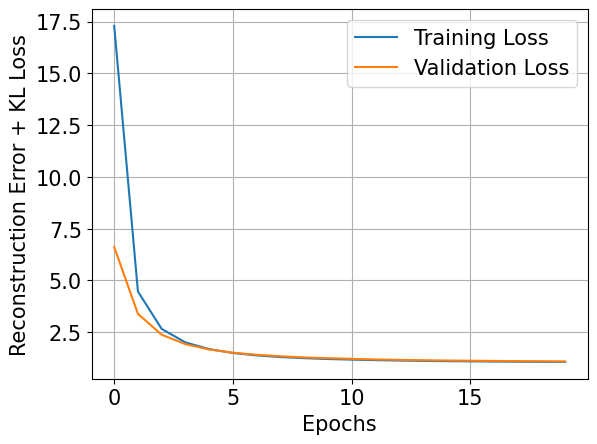

In [48]:
plt.grid()
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Error + KL Loss')
plt.legend()

In [49]:
pred1 = vae.predict(x_good)
score1 = metrics.mean_absolute_error(pred1,x_good)

pred2 = vae.predict(x_good_val)
score2 = metrics.mean_absolute_error(pred2,x_good_val)

pred3 = vae.predict(x_bad)
score3 = metrics.mean_absolute_error(pred3,x_bad)

print(f"Insample Good Score (MAE): {score1}".format(score1))
print(f"Out of Sample Good Score (MAE): {score2}".format(score2))
print(f"Bad sample Score (MAE): {score3}".format(score3))

71/71 [==============================] - 0s 4ms/step
Insample Good Score (MAE): 0.7936057331463895
Out of Sample Good Score (MAE): 0.7926543730435486
Bad sample Score (MAE): 0.8074475958106082


##### Results:


In [50]:
#Variational Autoencoder
decoded_inf = vae.predict(x_bad)

71/71 [==============================] - 0s 5ms/step


In [51]:
#errors per region for VAE for frontal atrophy
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(x_bad, decoded_inf, 'LIMBIC'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(0,450)]), np.array([decoded_inf[i,:] for i in range(0,450)]), 'CEREBELLUM'))

FRONTAL:    0.716381935520354
OCCIPITAL:  0.39552349079321414
TEMPORAL:   0.40022194661084387
PARIETAL:   0.41727807456443267


In [52]:
#errors per region for VAE for occipital atrophy
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(x_bad, decoded_inf, 'LIMBIC'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(450,900)]), np.array([decoded_inf[i,:] for i in range(450,900)]), 'CEREBELLUM'))

FRONTAL:    0.40225826367824724
OCCIPITAL:  0.6934796978221819
TEMPORAL:   0.39303521545897396
PARIETAL:   0.4000134651789225


In [53]:
#errors per region for VAE for temporal atrophy
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(x_bad, decoded_inf, 'LIMBIC'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(900,1350)]), np.array([decoded_inf[i,:] for i in range(900,1350)]), 'CEREBELLUM'))

FRONTAL:    0.397609283740505
OCCIPITAL:  0.38782943629680455
TEMPORAL:   0.7643521177404187
PARIETAL:   0.4048769624040553


In [54]:
#errors per region for VAE for parietal atrophy
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(x_bad, decoded_inf, 'LIMBIC'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(1350,1800)]), np.array([decoded_inf[i,:] for i in range(1350,1800)]), 'CEREBELLUM'))

FRONTAL:    0.3942914540231696
OCCIPITAL:  0.38860186541055985
TEMPORAL:   0.39110644426419694
PARIETAL:   0.7691689389266232


In [55]:
#errors per region for VAE for healthy subjects
print("FRONTAL:   ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'FRONTAL'))
print("OCCIPITAL: ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'OCCIPITAL'))
print("TEMPORAL:  ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'TEMPORAL'))
print("PARIETAL:  ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'PARIETAL'))
#print("DEEP_WM_GM:", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'DEEP_WM_GM'))
#print("LIMBIC:    ", mae_region(x_bad, decoded_inf, 'LIMBIC'))
#print("LIMBIC:    ", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'LIMBIC'))
#print("CEREBELLUM:", mae_region(np.array([x_bad[i,:] for i in range(1800,test_df.shape[0])]), np.array([decoded_inf[i,:] for i in range(1800,test_df.shape[0])]), 'CEREBELLUM'))

FRONTAL:    0.4044119769463283
OCCIPITAL:  0.38876392287443307
TEMPORAL:   0.3964459264215682
PARIETAL:   0.4104249851545531


In [56]:
#variational Autoencoder

column_list = test_df.columns.tolist()
bad_df = pd.DataFrame(x_bad, columns=column_list)
pred_df = vae.predict(x_bad)

res_df = pred_df - bad_df
res_df[res_df < 0] = 0
res_df['atrophy pattern']= new_column_values

71/71 [==============================] - 0s 4ms/step


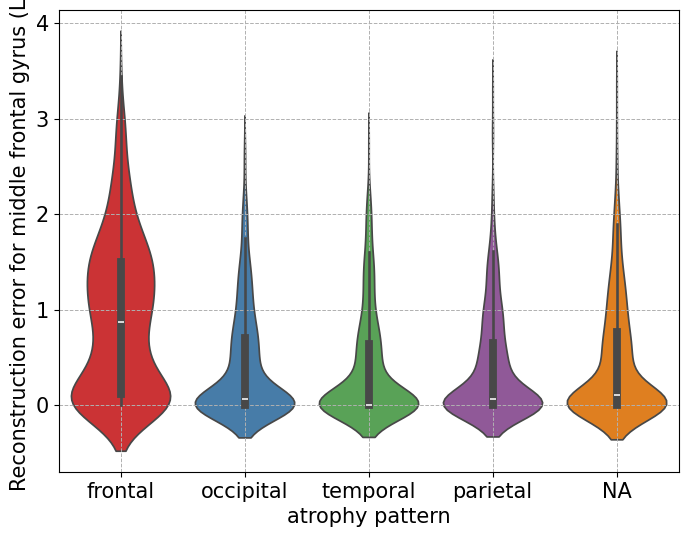

In [57]:
#violinplot frontal 1
my_pal_sex = sns.color_palette("Set1", 5)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_143', x='atrophy pattern', data=res_df, hue='atrophy pattern', palette=my_pal_sex,
             ax=ax)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for middle frontal gyrus (L)')
plt.rcParams.update({'font.size': 13})

# Show the plot
plt.show()

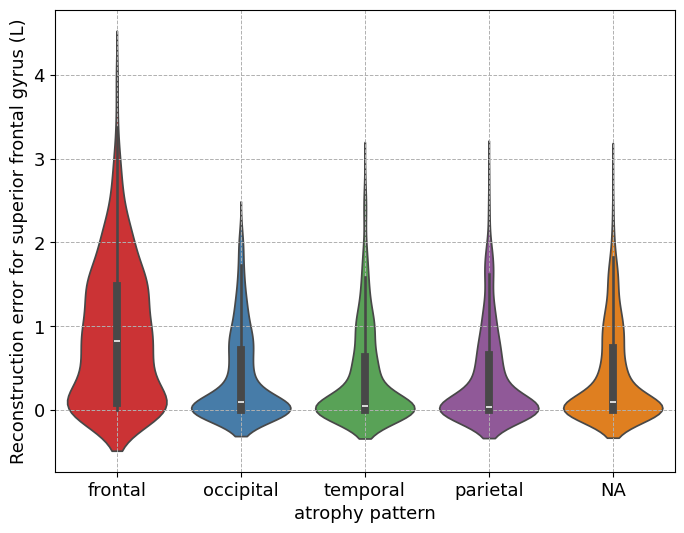

In [58]:
#violinplot frontal 2
my_pal_sex = sns.color_palette("Set1", 5)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_191', x='atrophy pattern', data=res_df, hue='atrophy pattern', palette=my_pal_sex,
             ax=ax)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for superior frontal gyrus (L)')

# Show the plot
plt.show()

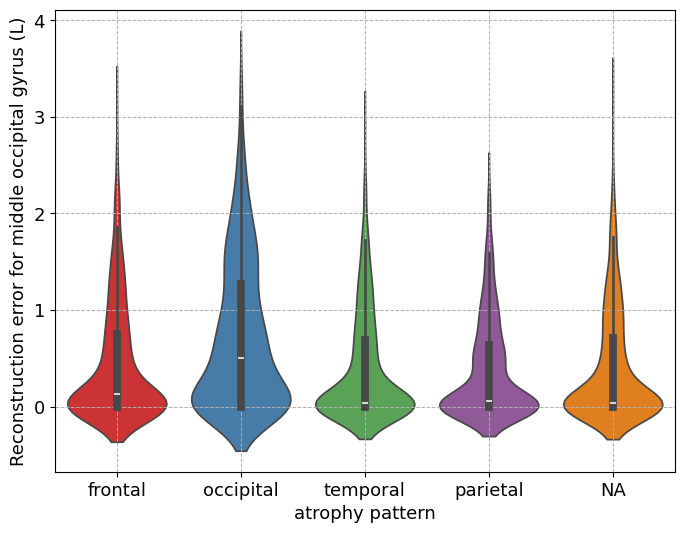

In [59]:
#violinplot occipital 1
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_145', x='atrophy pattern', data=res_df, hue='atrophy pattern', palette=my_pal_sex,
             ax=ax)
# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for middle occipital gyrus (L)')
# Show the plot
plt.show()

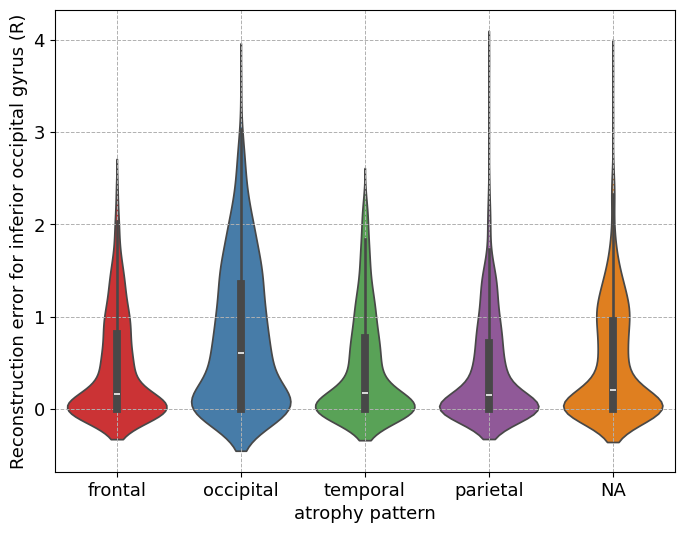

In [60]:
#violinplot occipital 2
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_128', x='atrophy pattern', data=res_df, hue='atrophy pattern', palette=my_pal_sex,
             ax=ax)
# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for inferior occipital gyrus (R)')
# Show the plot
plt.show()

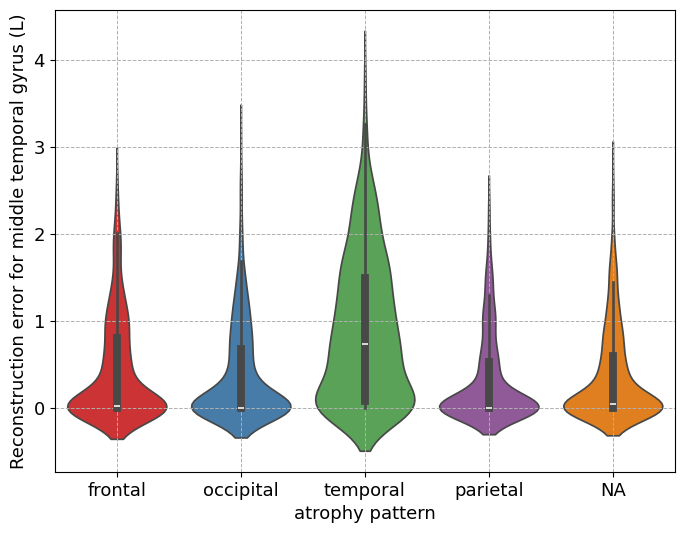

In [61]:
#violinplot temporal 1
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_155', x='atrophy pattern', data=res_df, hue='atrophy pattern', legend = False,
                palette=my_pal_sex)
# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for middle temporal gyrus (L)')
# Show the plot
plt.show()

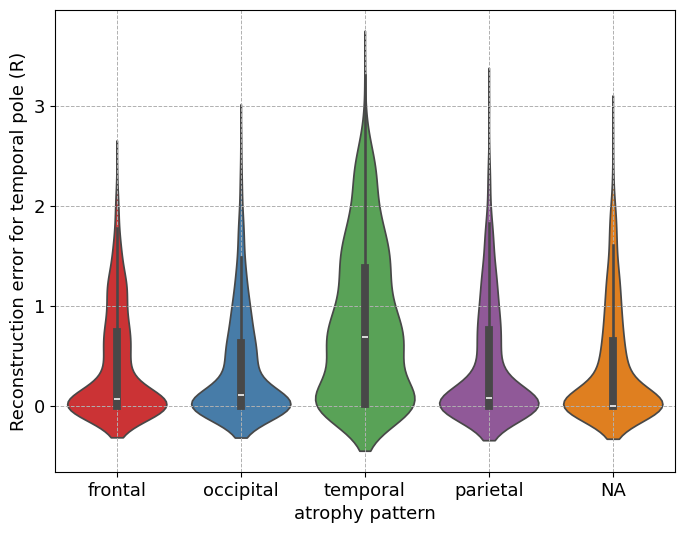

In [62]:
#violinplot temporal 2
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_202', x='atrophy pattern', data=res_df, hue='atrophy pattern', legend = False,
                palette=my_pal_sex)
# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for temporal pole (R)')
# Show the plot
plt.show()

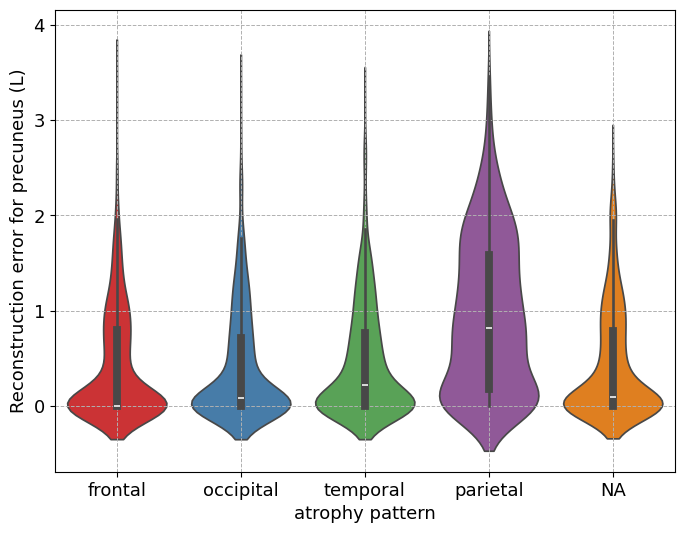

In [63]:
#violinplot parietal 1
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_169', x='atrophy pattern', data=res_df, hue='atrophy pattern', legend = False,
                palette=my_pal_sex)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for precuneus (L)')

# Show the plot
plt.show()

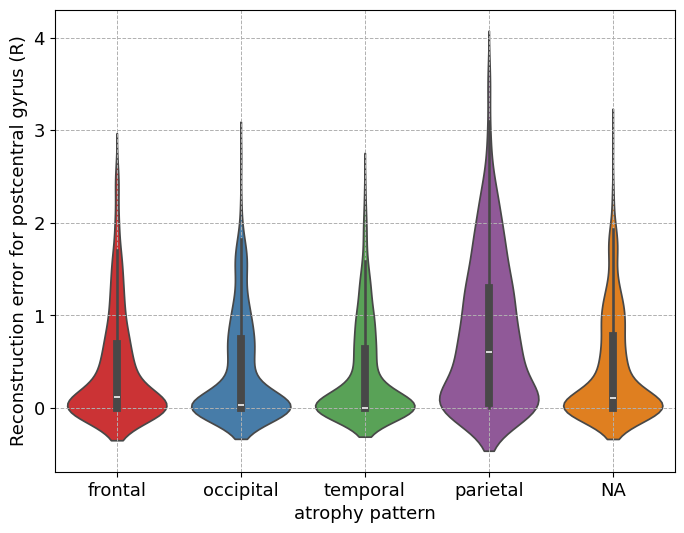

In [64]:
#violinplot parietal 2
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(y='MUSE_Volume_176', x='atrophy pattern', data=res_df, hue='atrophy pattern', legend = False,
                palette=my_pal_sex)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylabel('Reconstruction error for postcentral gyrus (R)')

# Show the plot
plt.show()

##### end